# Data Analysis and Processing from Penalty Kick 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import ast

### Import whole dataframe from .csv file

### Must be processed from .json file to .csv via behav_process.py before this will work

In [2]:
df = pd.read_csv('data/pkick_practice1_Vs_practice2_2.csv')
df = df.drop('Unnamed: 0', axis = 1)

### Dataframe for trial timing and information (most changes each trial or each run)

In [3]:
trial_timing_and_info = df[['runStart', 'trialStart', 'StartOfGame', 'trialLength', 'BallPlayer',
                            'Opponent','outcome','RewardBall', 'RewardBar']].drop(0).reset_index()

trial_timing_and_info

,index,runStart,trialStart,StartOfGame,trialLength,BallPlayer,Opponent,outcome,RewardBall,RewardBar
0,1,9.025114,0.000031,3.099680,1.923110,practice1,human,win,0.5,0.0
1,2,9.025114,6.535956,9.648278,1.849920,practice1,human,loss,0.0,0.5
2,3,9.025114,13.010576,16.307801,1.923199,practice1,human,win,0.5,0.0
3,4,31.464099,0.000023,3.096793,1.980875,practice2,human,win,0.5,0.0
4,5,31.464099,6.589260,9.687609,1.907753,practice2,human,loss,0.0,0.5
5,6,31.464099,13.106900,16.196668,1.870429,practice2,human,loss,0.0,0.5


### Dataframe for overall timing and information about experiment (doesn't change each trial)

In [4]:
overall_timing_and_info = df[['overallStartTime', 'RunLength', 'runType', 'P2Name', 
                              'BallJoystickNum', 'BarJoystickNum', 'SubjName', 'P2Name']].dropna()

overall_timing_and_info

,overallStartTime,RunLength,runType,P2Name,BallJoystickNum,BarJoystickNum,SubjName,P2Name
0,12:39:22:577612,3.0,Vs,practice2,0.0,1.0,practice1,practice2


### Dataframe for screen information

In [5]:
screen_constants = df[['ScreenRect', 'BallRadius', 'BallSpeed', 'BallStartingPosX',
                      'BallStartingPosY', 'BarLength', 'BarWidth', 'BarStartingPosX',
                      'BarStartingPosY', 'BarJoystickBaseSpeed', 'FinalLine']].dropna().to_dict('list')

for k, v in screen_constants.iteritems():
    screen_constants[k] = screen_constants[k][0]

screen_constants['ScreenRect'] = ast.literal_eval(screen_constants['ScreenRect'])

screen_constants

{'BallRadius': 6.25,
 'BallSpeed': 4.0,
 'BallStartingPosX': -300.0,
 'BallStartingPosY': 0.0,
 'BarJoystickBaseSpeed': 2.6666666666699999,
 'BarLength': 100.0,
 'BarStartingPosX': 300.0,
 'BarStartingPosY': 0.0,
 'BarWidth': 6.25,
 'FinalLine': 318.75,
 'ScreenRect': [800, 600]}

### Dataframe for plotting information

In [6]:
df_plotting = df.drop(0).reset_index().drop('index', axis=1)

ball_positions = pd.Series()
barY = pd.Series()
balljoy = pd.Series()
barjoy = pd.Series()
timingseq = pd.Series()

for i in range(len(df_plotting)):
    if type(df_plotting.loc[i, 'BallPositions']) == str:
        ball_positions.loc[i] = ast.literal_eval(df_plotting.loc[i, 'BallPositions'])
        
for i in range(len(df_plotting)):
    if type(df_plotting.loc[i, 'BarY']) == str:
        barY.loc[i] = ast.literal_eval(df_plotting.loc[i, 'BarY'])
        
for i in range(len(df_plotting)):
    if type(df_plotting.loc[i, 'BallJoystickHistory']) == str:
        balljoy.loc[i] = ast.literal_eval(df_plotting.loc[i, 'BallJoystickHistory'])
        
for i in range(len(df_plotting)):
    if type(df_plotting.loc[i, 'BarJoystickHistory']) == str:
        barjoy.loc[i] = ast.literal_eval(df_plotting.loc[i, 'BarJoystickHistory'])
        
for i in range(len(df_plotting)):
    if type(df_plotting.loc[i, 'TimingSequence']) == str:
        timingseq.loc[i] = ast.literal_eval(df_plotting.loc[i, 'TimingSequence'])

currentRun = df_plotting.loc[:, 'currentRun']        
trial = df_plotting.loc[:, 'trial']

plottingdf = pd.DataFrame({'BallPositions': ball_positions,
                           'BarY': barY,
                           'BallJoystickHistory': balljoy,
                           'BarJoystickHistory': barjoy,
                           'TimingSequence': timingseq,
                           'currentRun': currentRun,
                           'trial': trial})
plottingdf

,BallJoystickHistory,BallPositions,BarJoystickHistory,BarY,TimingSequence,currentRun,trial
0,"[[0.482330322266, 0.490173339844, 0.4901733398...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.716796875, 1.63175455729, 2.61450195312, 3....","[3.12730503082, 3.13782095909, 3.14829611778, ...",0.0,0.0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.66658528646, -5.33317057292, -7.9997558593...","[3.12185287476, 3.13262200356, 3.14258885384, ...",0.0,1.0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.66666666667, 5.33333333333, 8.0, 10.7851851...","[3.30649995804, 3.31620311737, 3.32649993896, ...",0.0,2.0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.231353759766, 0.231353759766, 0.2313537597...","[2.66666666667, 5.33333333333, 8.0, 10.7851851...","[3.10693097115, 3.11701512337, 3.12682914734, ...",1.0,0.0
4,"[[-0.366577148438, -0.401763916016, -0.4408569...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1293945...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.407877604167, 1.02...","[3.10743117332, 3.11836504936, 3.12887811661, ...",1.0,1.0
5,"[[-0.186706542969, -0.186706542969, -0.1867065...","[[-300.0, -300.0, -300.0, -300.0, -300.0, -300...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.09939193726, 3.1100590229, 3.11984491348, 3...",1.0,2.0


# End of Basic Data Processing

### Data summaries saved in: 

- trial_timing_and_info 
- overall_timing_and_info 
- screen_constants
- plottingdf

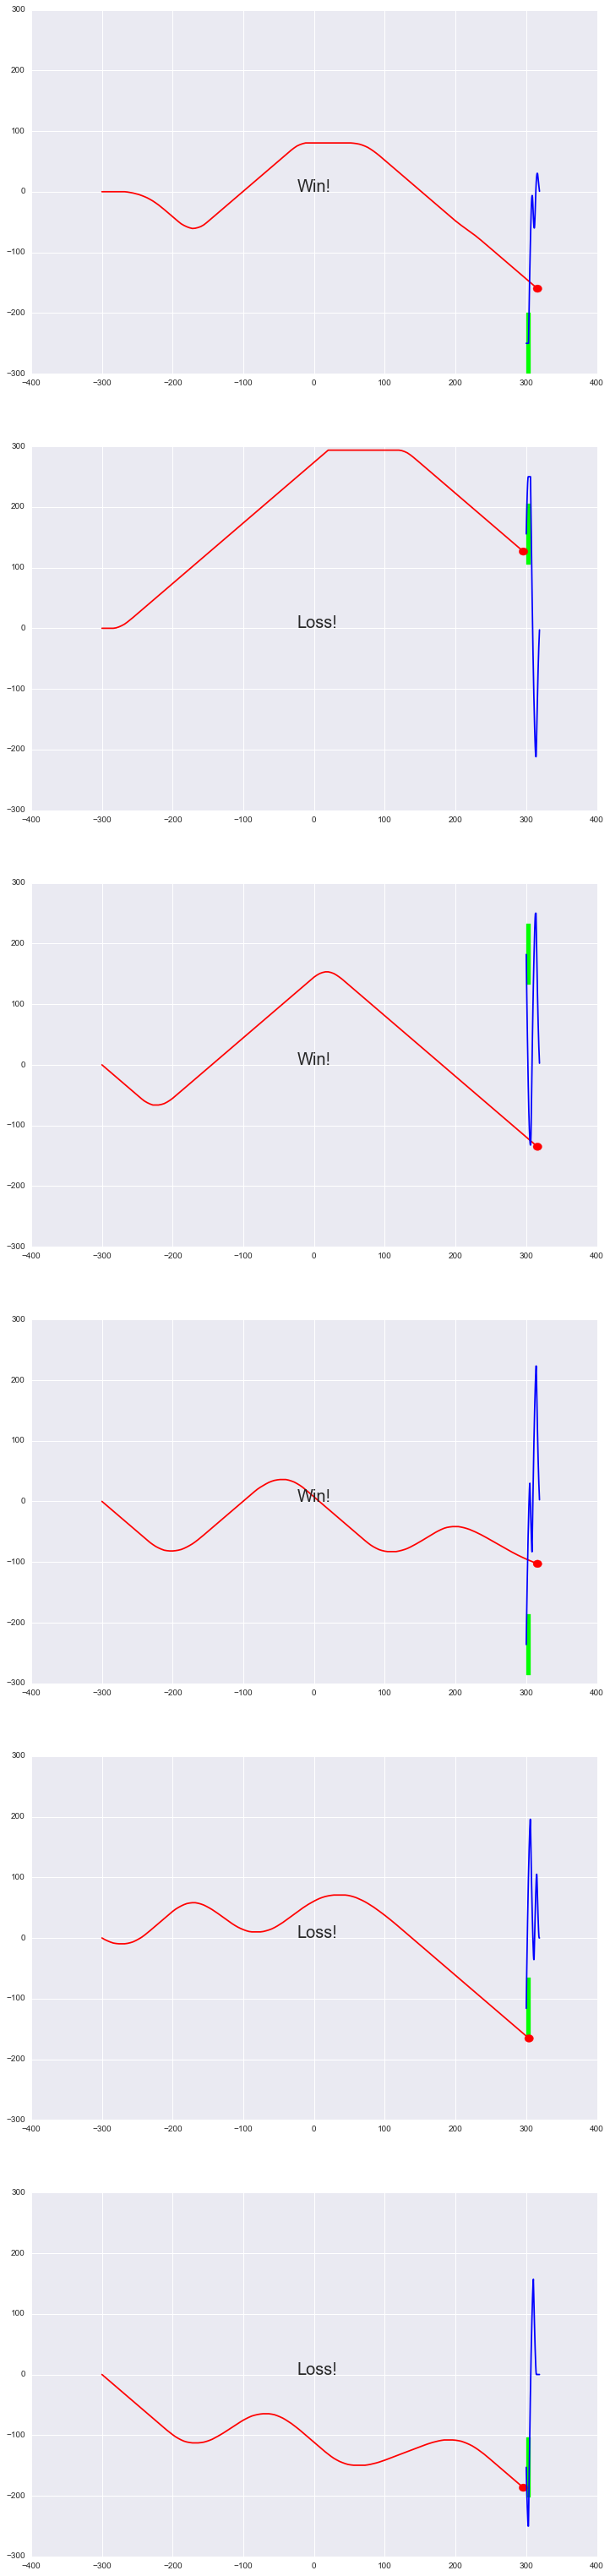

In [234]:
fig, ax = plt.subplots(len(plottingdf), figsize=[12, 9*len(plottingdf)])

for i in range(len(plottingdf)):
    # Ball
    ax[i].plot(plottingdf.loc[i, 'BallPositions'][0], plottingdf.loc[i, 'BallPositions'][1], color='r')
    circle1 = plt.Circle((plottingdf.loc[i, "BallPositions"][0][-1], 
                          plottingdf.loc[i, "BallPositions"][1][-1]), 
                         screen_constants['BallRadius'] , color='r')
    ax[i].add_artist(circle1)
    
    # Bar
    ax[i].plot(np.linspace(screen_constants['FinalLine'], 
                           screen_constants['BarStartingPosX'], 
                           len(plottingdf.loc[i, 'BarY'])),
               plottingdf.loc[i, 'BarY'], color='b')
    ax[i].add_patch(mpl.patches.Rectangle(
        (screen_constants['BarStartingPosX'], plottingdf.loc[i, 'BarY'][-1]-50.),   # (x,y)
        screen_constants['BarWidth'],                                               # width
        screen_constants['BarLength'], color='lime'))                         # height
    
    ax[i].set_xlim(-screen_constants['ScreenRect'][0]/2., screen_constants['ScreenRect'][0]/2.)
    ax[i].set_ylim(-screen_constants['ScreenRect'][1]/2., screen_constants['ScreenRect'][1]/2.)
    
    ax[i].text(0.47, 0.5, trial_timing_and_info.loc[i, 'outcome'].capitalize()+'!', 
                   size = 20, transform=ax[i].transAxes)
#fig.savefig('practice_plotting.png')

In [55]:
def derivative(y, x='nothing'):
    if x == 'nothing':
        x = np.arange(len(y))
    xdifferences = np.diff(x)
    ydifferences = np.diff(y)
    xdifferences = np.append(xdifferences, xdifferences[-1])
    ydifferences = np.append(ydifferences, ydifferences[-1])
    prime = ydifferences/xdifferences
    prime = np.nan_to_num(prime)
    
    return prime

derivative(plottingdf.loc[0, 'BallPositions'][1], plottingdf.loc[0, 'BallPositions'][0])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.12155151,
       -0.19213867, -0.23135376, -0.27841187, -0.31762695, -0.41174316,
       -0.45880127, -0.51370239, -0.62350464, -0.67840576, -0.78820801,
       -0.83526611, -0.92153931, -0.95291138, -0.97644043, -0.99996948,
       -0.99996948, -0.99996948, -0.99996948, -0.92153931, -0.67840576,
       -0.55291748, -0.4274292 , -0.28625488,  0.105896  ,  0.29412842,
        0.42745972,  0.67059326,  0.90588379,  0.97647095,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

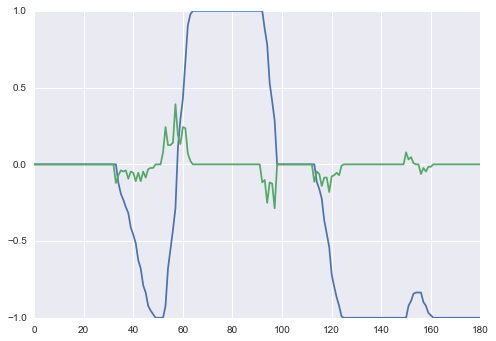

In [41]:
for i in range(len(df_plotting)):
    fig, ax = plt.subplots()

    ax.plot(derivative(plottingdf.loc[0, 'BallPositions'][1], plottingdf.loc[0, 'BallPositions'][0]))
    ax.plot(derivative(derivative(plottingdf.loc[0, 'BallPositions'][1], plottingdf.loc[0, 'BallPositions'][0])))

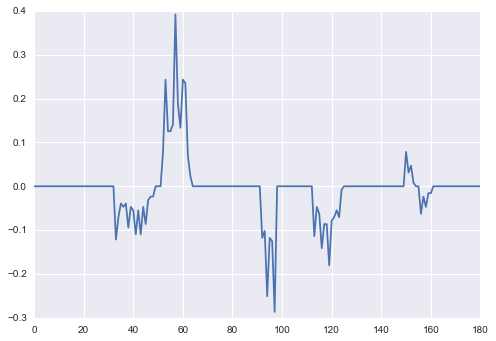

In [40]:
fig, ax = plt.subplots()

ax.plot(derivative(derivative(plottingdf.loc[0, 'BallPositions'][1], plottingdf.loc[0, 'BallPositions'][0])))

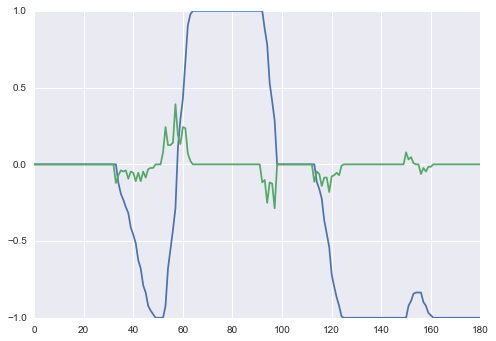

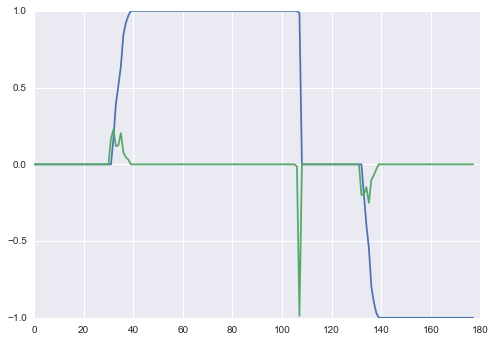

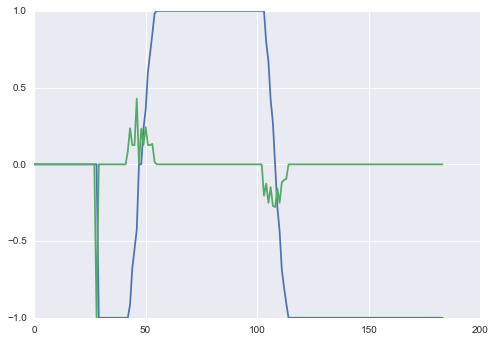

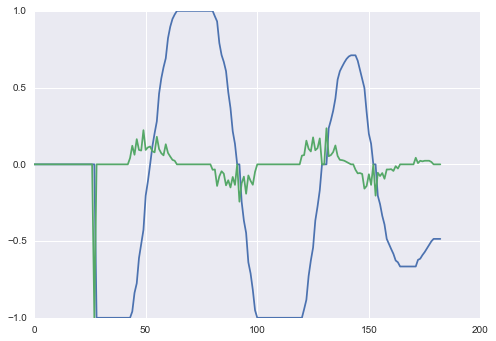

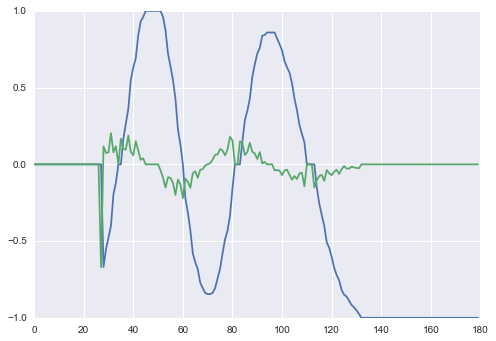

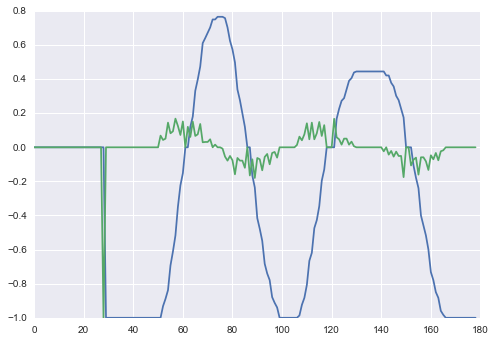

In [42]:
for i in range(len(df_plotting)):
    fig, ax = plt.subplots()

    ax.plot(derivative(plottingdf.loc[i, 'BallPositions'][1], plottingdf.loc[i, 'BallPositions'][0]))
    ax.plot(derivative(derivative(plottingdf.loc[i, 'BallPositions'][1], plottingdf.loc[i, 'BallPositions'][0])))

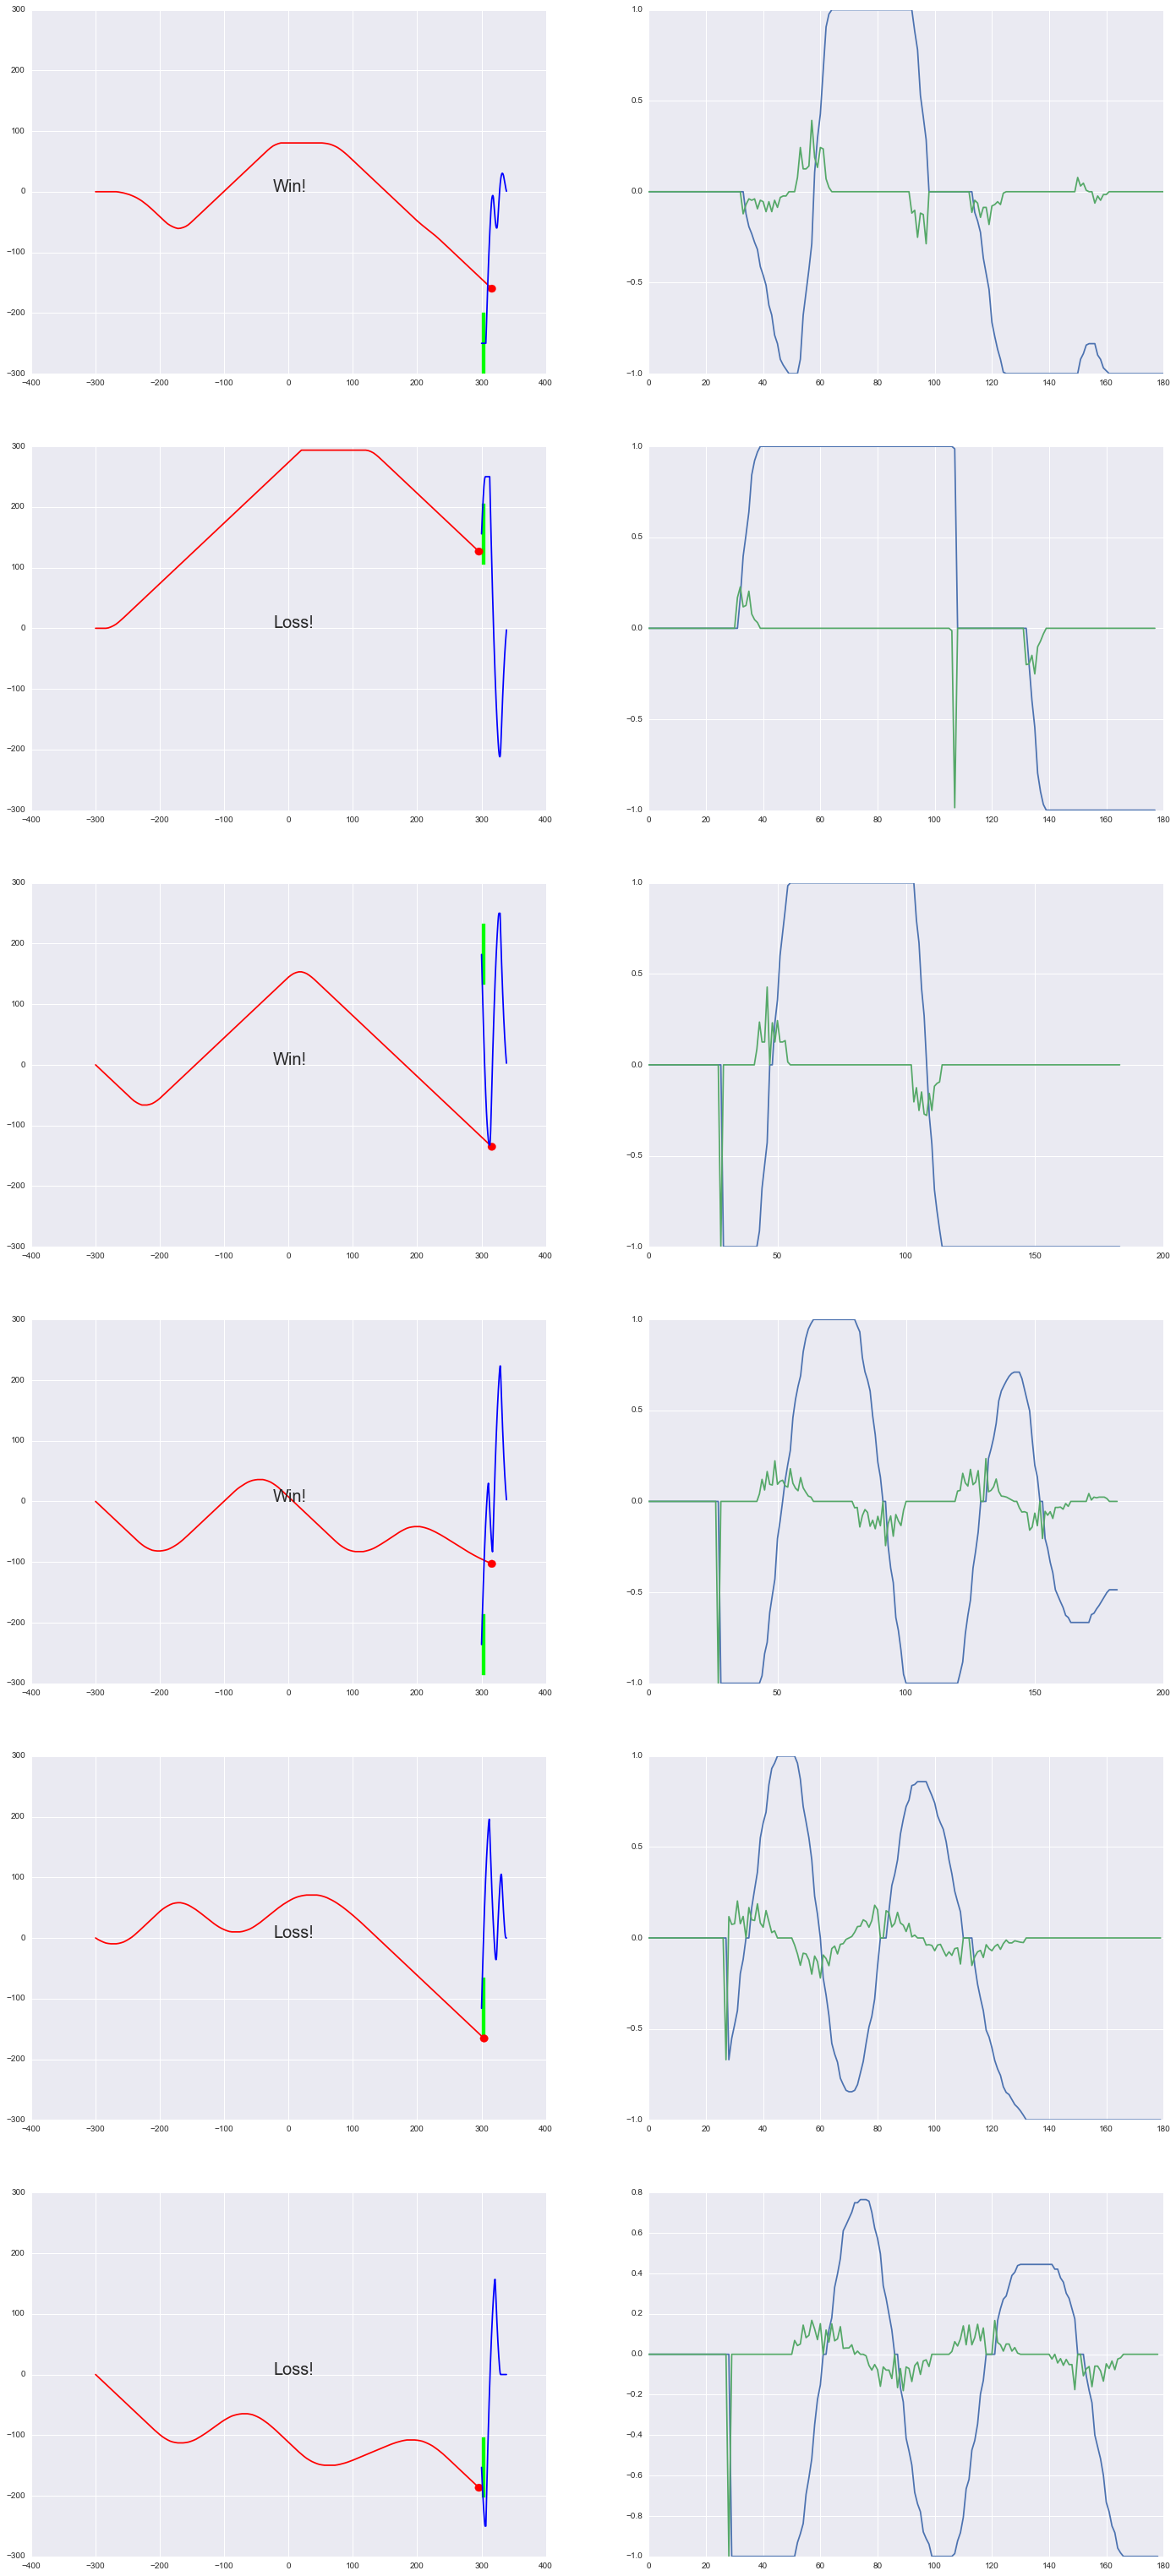

In [56]:
fig, ax = plt.subplots(len(plottingdf), 2, figsize=[24, 9*len(plottingdf)])

for i in range(len(plottingdf)):
    # Ball
    ax[i, 0].plot(plottingdf.loc[i, 'BallPositions'][0], plottingdf.loc[i, 'BallPositions'][1], color='r')
    circle1 = plt.Circle((plottingdf.loc[i, "BallPositions"][0][-1], 
                          plottingdf.loc[i, "BallPositions"][1][-1]), 
                         screen_constants['BallRadius'] , color='r')
    ax[i, 0].add_artist(circle1)
    
    # Bar
    ax[i, 0].plot(np.linspace(screen_constants['FinalLine']+20., 
                           screen_constants['BarStartingPosX'], 
                           len(plottingdf.loc[i, 'BarY'])),
               plottingdf.loc[i, 'BarY'], color='b')
    ax[i, 0].add_patch(mpl.patches.Rectangle(
        (screen_constants['BarStartingPosX'], plottingdf.loc[i, 'BarY'][-1]-50.),   # (x,y)
        screen_constants['BarWidth'],                                               # width
        screen_constants['BarLength'], color='lime'))                         # height
    
    ax[i, 0].set_xlim(-screen_constants['ScreenRect'][0]/2., screen_constants['ScreenRect'][0]/2.)
    ax[i, 0].set_ylim(-screen_constants['ScreenRect'][1]/2., screen_constants['ScreenRect'][1]/2.)
    
    ax[i, 0].text(0.47, 0.5, trial_timing_and_info.loc[i, 'outcome'].capitalize()+'!', 
                   size = 20, transform=ax[i, 0].transAxes)
    
    ax[i,1].plot(derivative(plottingdf.loc[i, 'BallPositions'][1], plottingdf.loc[i, 'BallPositions'][0]))
    ax[i,1].plot(derivative(derivative(plottingdf.loc[i, 'BallPositions'][1], plottingdf.loc[i, 'BallPositions'][0])))
    
fig.savefig('plots_with_derivatives_ball.png')

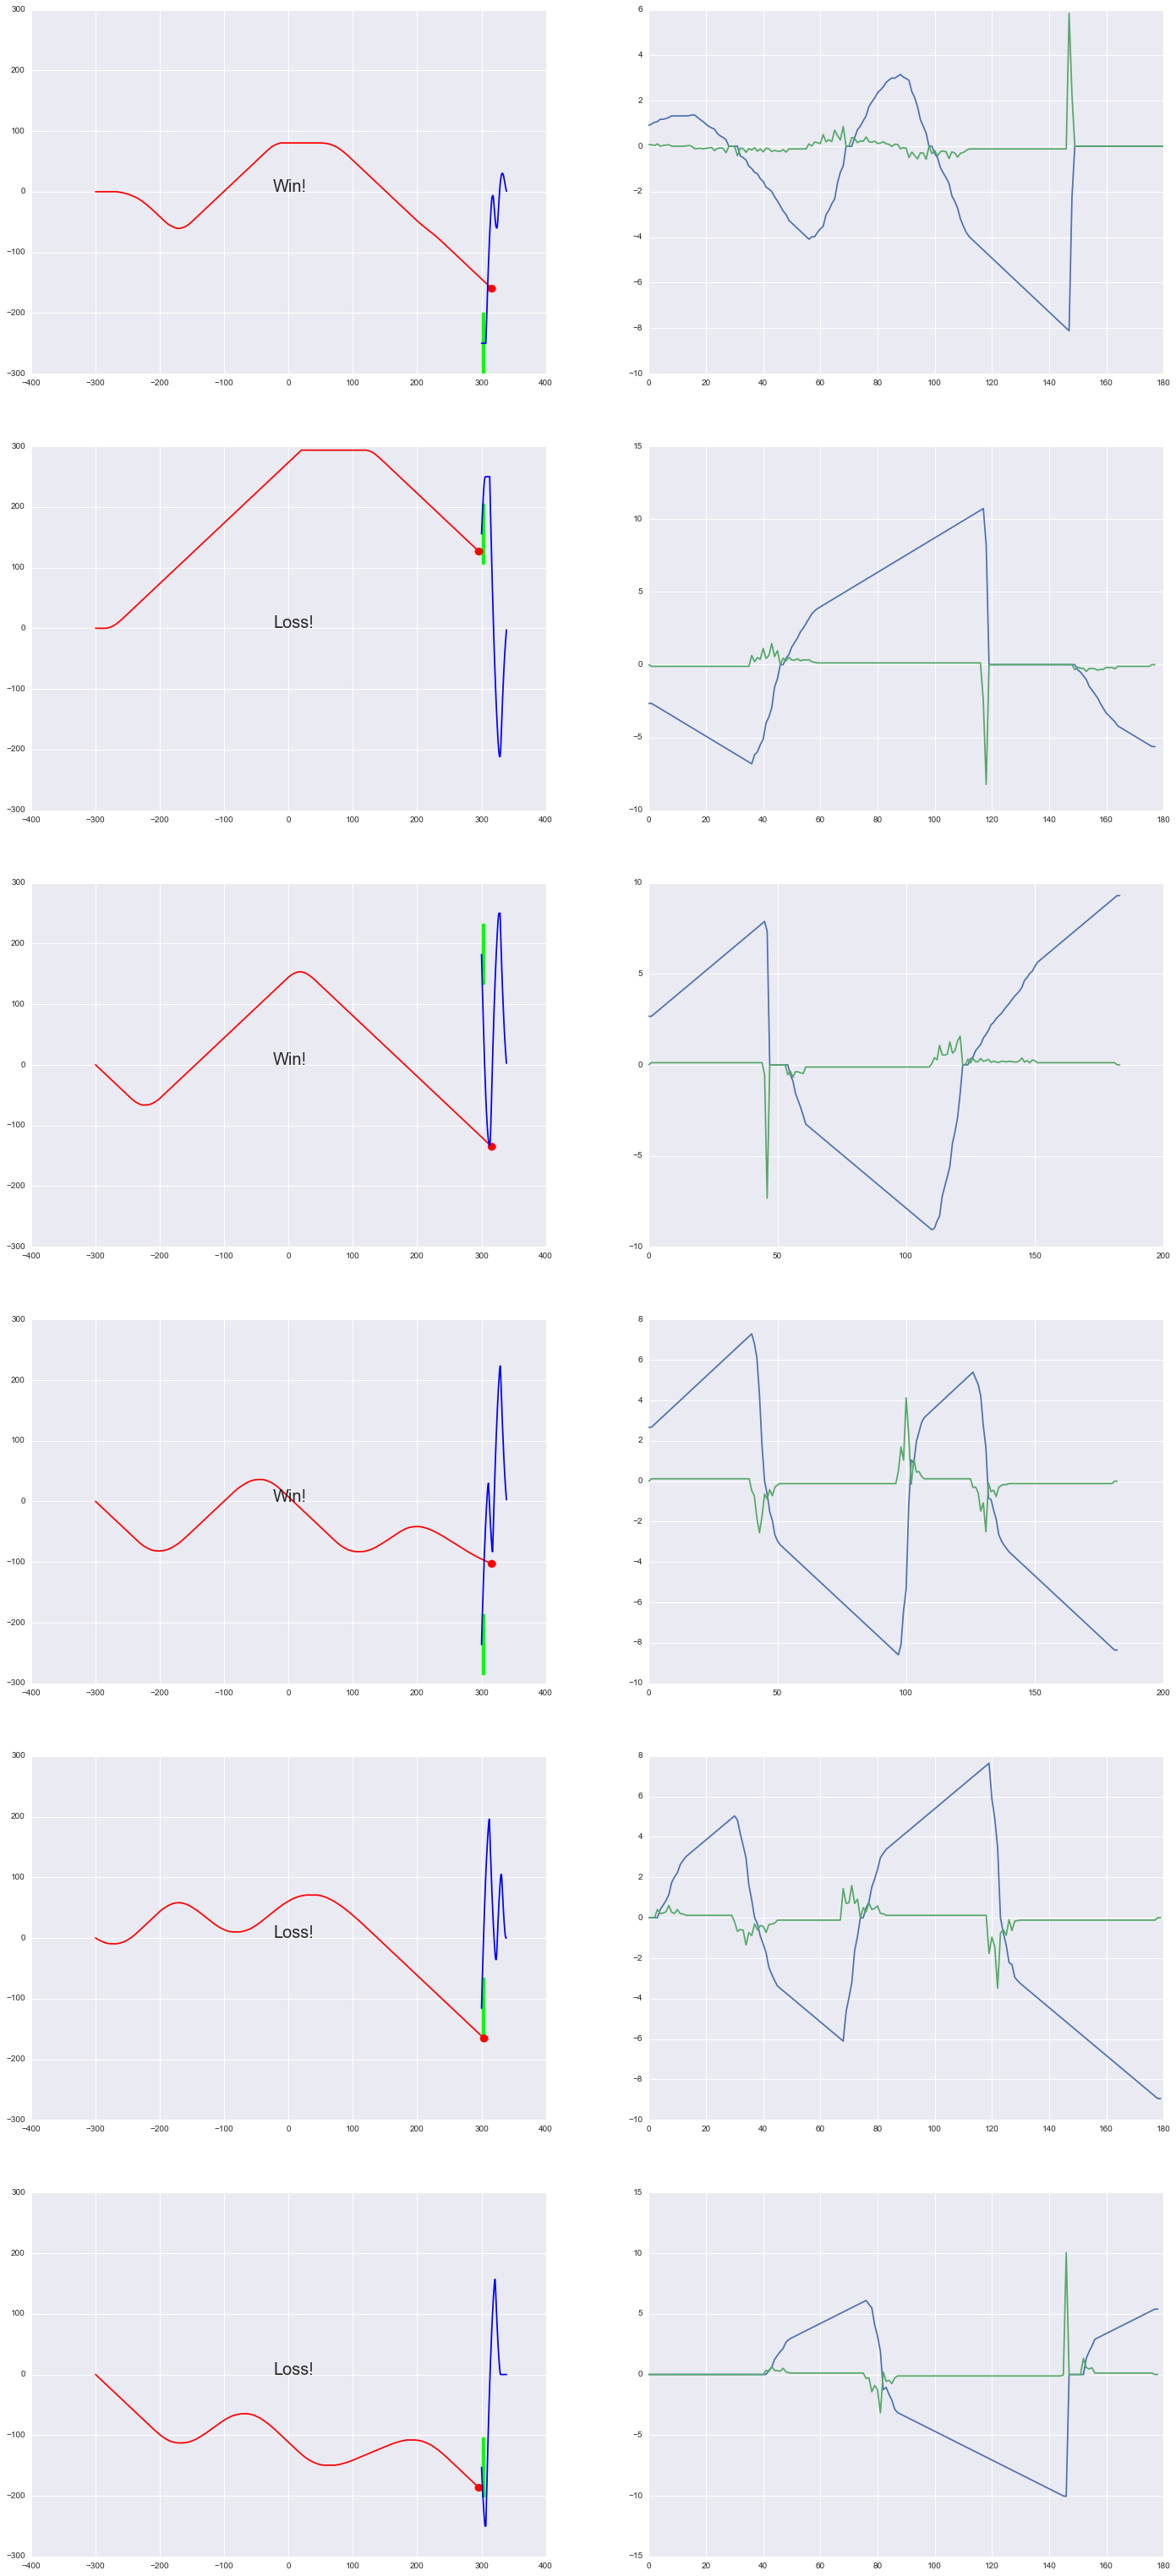

In [62]:
fig, ax = plt.subplots(len(plottingdf), 2, figsize=[24, 9*len(plottingdf)])

for i in range(len(plottingdf)):
    # Ball
    ax[i, 0].plot(plottingdf.loc[i, 'BallPositions'][0], plottingdf.loc[i, 'BallPositions'][1], color='r')
    circle1 = plt.Circle((plottingdf.loc[i, "BallPositions"][0][-1], 
                          plottingdf.loc[i, "BallPositions"][1][-1]), 
                         screen_constants['BallRadius'] , color='r')
    ax[i, 0].add_artist(circle1)
    
    # Bar
    ax[i, 0].plot(np.linspace(screen_constants['FinalLine']+20., 
                           screen_constants['BarStartingPosX'], 
                           len(plottingdf.loc[i, 'BarY'])),
               plottingdf.loc[i, 'BarY'], color='b')
    ax[i, 0].add_patch(mpl.patches.Rectangle(
        (screen_constants['BarStartingPosX'], plottingdf.loc[i, 'BarY'][-1]-50.),   # (x,y)
        screen_constants['BarWidth'],                                               # width
        screen_constants['BarLength'], color='lime'))                         # height
    
    ax[i, 0].set_xlim(-screen_constants['ScreenRect'][0]/2., screen_constants['ScreenRect'][0]/2.)
    ax[i, 0].set_ylim(-screen_constants['ScreenRect'][1]/2., screen_constants['ScreenRect'][1]/2.)
    
    ax[i, 0].text(0.47, 0.5, trial_timing_and_info.loc[i, 'outcome'].capitalize()+'!', 
                   size = 20, transform=ax[i, 0].transAxes)
    
    ax[i,1].plot(derivative(plottingdf.loc[i, 'BarY']))
    ax[i,1].plot(derivative(derivative(plottingdf.loc[i, 'BarY'] )))
    
fig.savefig('plots_with_derivatives_bar.png')

In [93]:
def derivative_second_order(y,h):
    double_prime = []
    y = np.array(y)
    for i in range(len(y)):
        try:
            double_prime.append(((y[i+1])-2*y[i] +(y[i-1]))/h**2.)
        except IndexError:
            double_prime.append(0)
    double_prime[0] = 0
    return double_prime

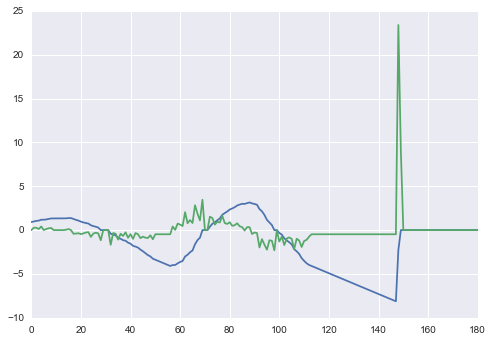

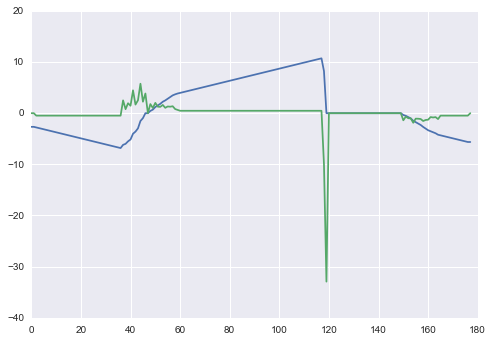

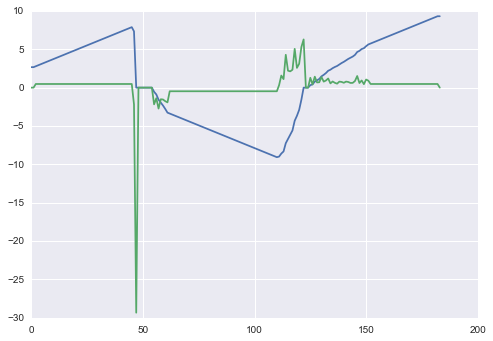

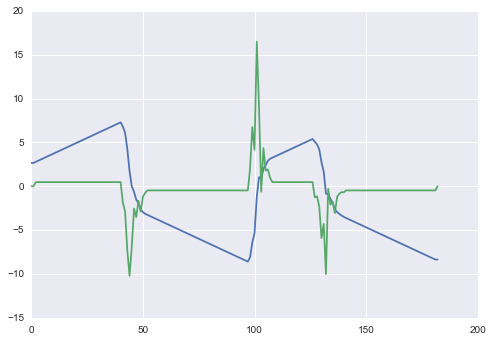

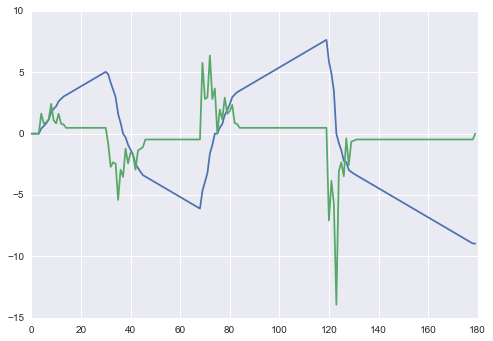

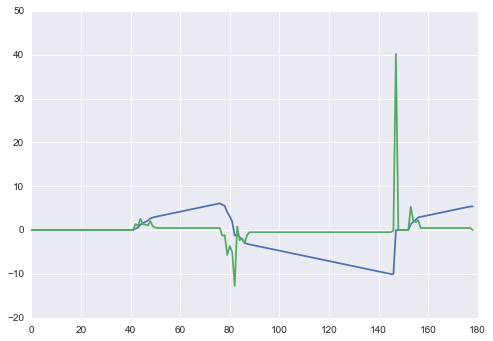

In [94]:
for i in range(len(df_plotting)):
    fig, ax = plt.subplots()

    ax.plot(derivative(plottingdf.loc[i, 'BarY']))
    ax.plot(derivative_second_order(plottingdf.loc[i, 'BarY'], .5))

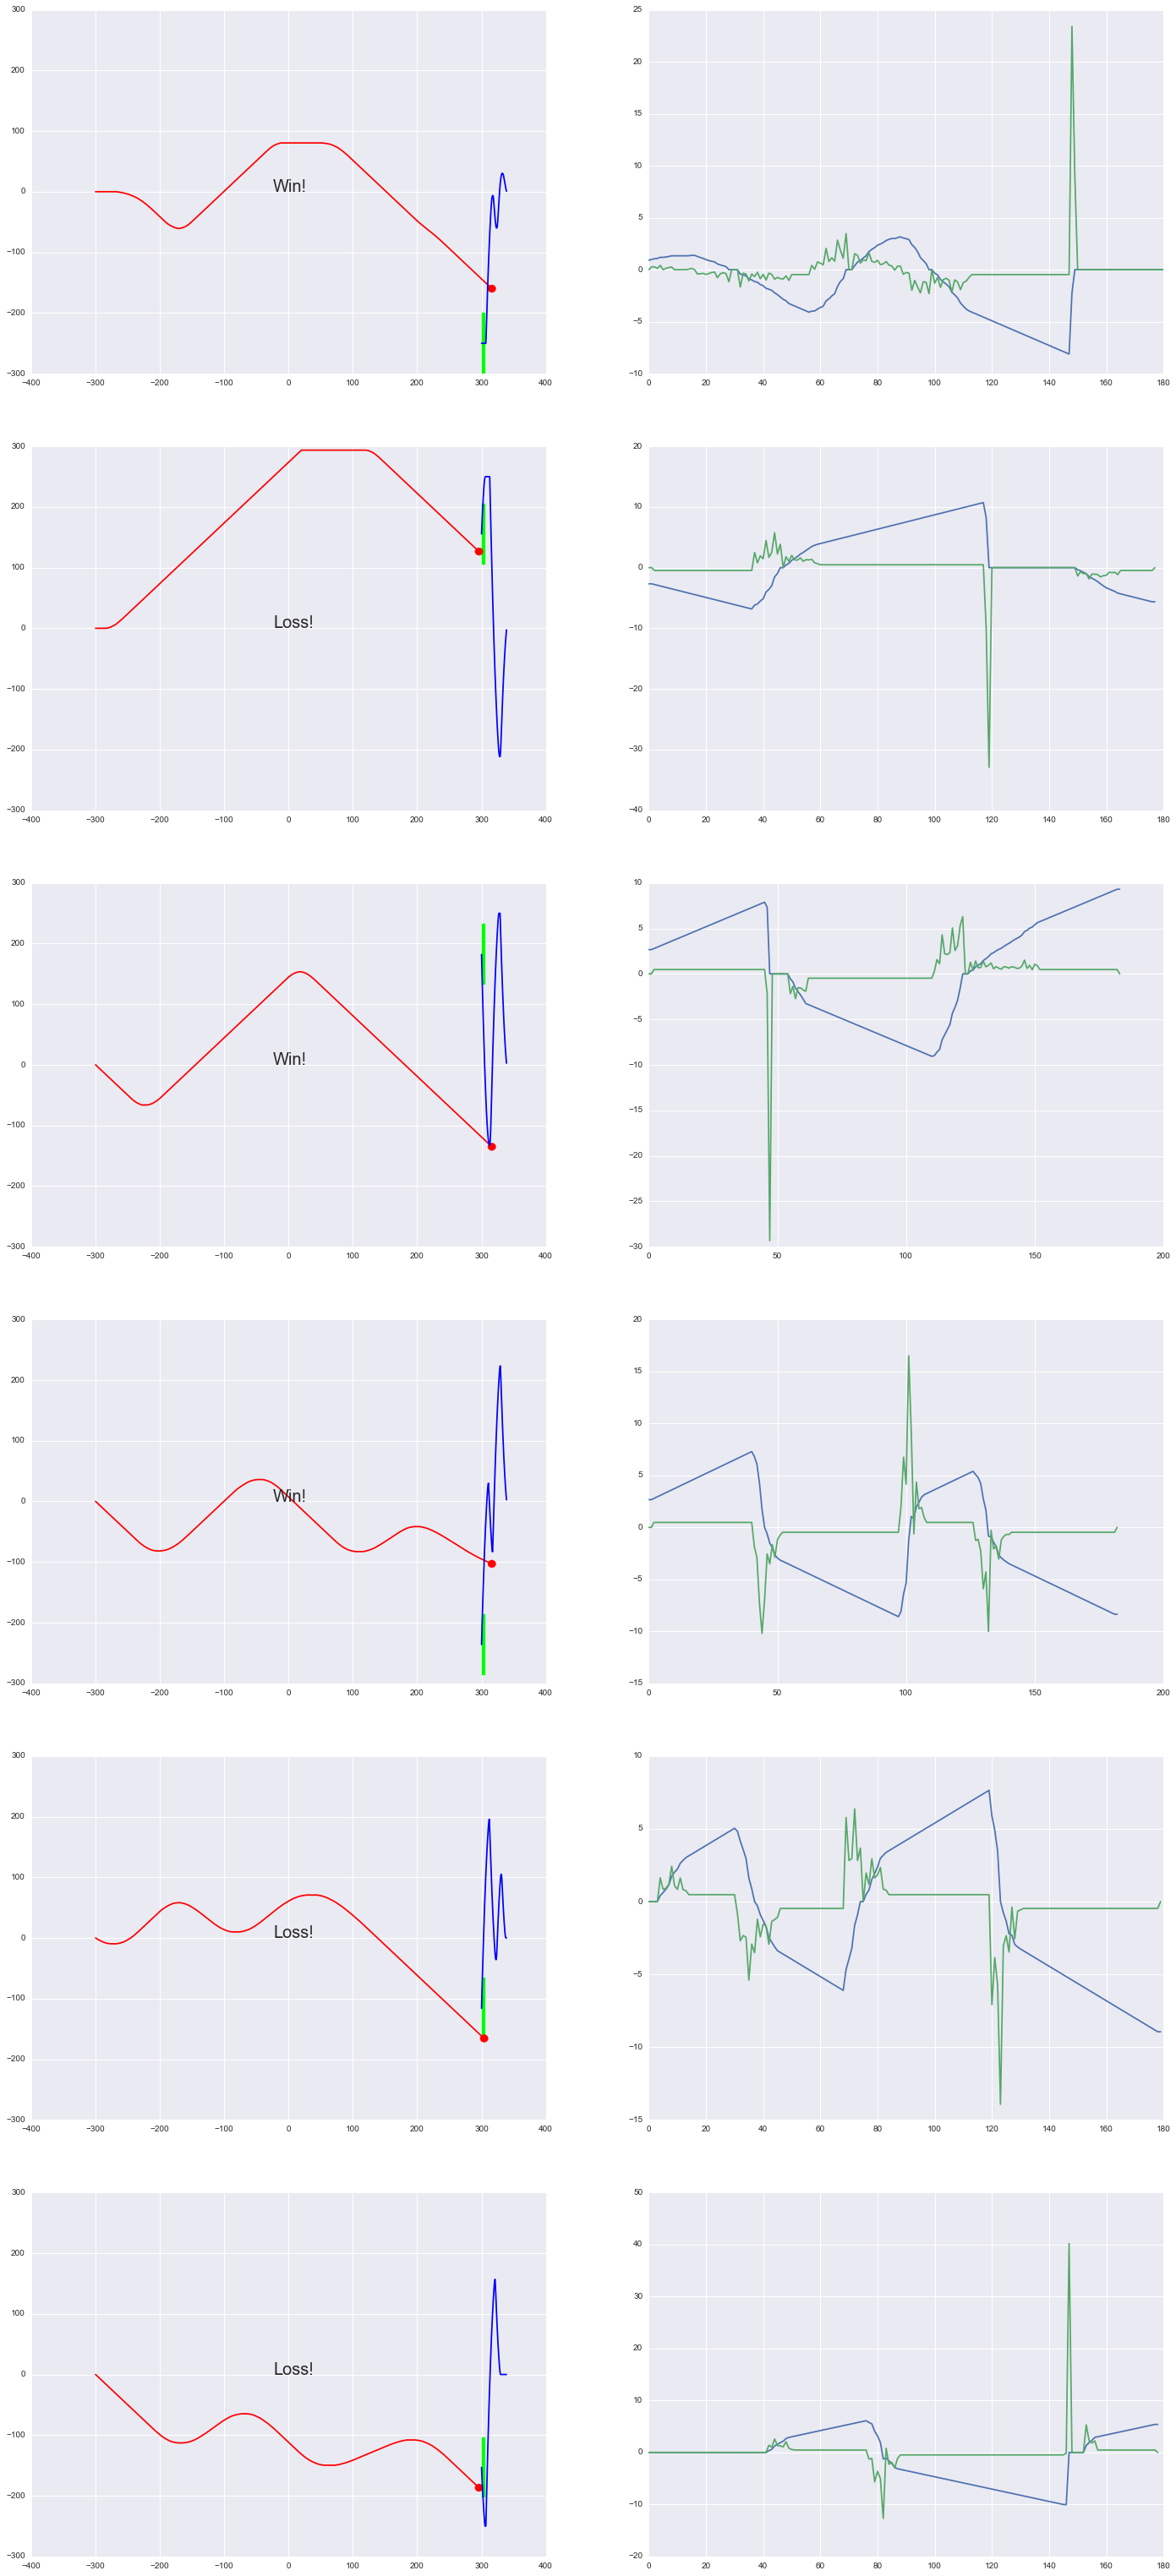

In [101]:
fig, ax = plt.subplots(len(plottingdf), 2, figsize=[24, 9*len(plottingdf)])

for i in range(len(plottingdf)):
    # Ball
    ax[i, 0].plot(plottingdf.loc[i, 'BallPositions'][0], plottingdf.loc[i, 'BallPositions'][1], color='r')
    circle1 = plt.Circle((plottingdf.loc[i, "BallPositions"][0][-1], 
                          plottingdf.loc[i, "BallPositions"][1][-1]), 
                         screen_constants['BallRadius'] , color='r')
    ax[i, 0].add_artist(circle1)
    
    # Bar
    ax[i, 0].plot(np.linspace(screen_constants['FinalLine']+20., 
                           screen_constants['BarStartingPosX'], 
                           len(plottingdf.loc[i, 'BarY'])),
               plottingdf.loc[i, 'BarY'], color='b')
    ax[i, 0].add_patch(mpl.patches.Rectangle(
        (screen_constants['BarStartingPosX'], plottingdf.loc[i, 'BarY'][-1]-50.),   # (x,y)
        screen_constants['BarWidth'],                                               # width
        screen_constants['BarLength'], color='lime'))                         # height
    
    ax[i, 0].set_xlim(-screen_constants['ScreenRect'][0]/2., screen_constants['ScreenRect'][0]/2.)
    ax[i, 0].set_ylim(-screen_constants['ScreenRect'][1]/2., screen_constants['ScreenRect'][1]/2.)
    
    ax[i, 0].text(0.47, 0.5, trial_timing_and_info.loc[i, 'outcome'].capitalize()+'!', 
                   size = 20, transform=ax[i, 0].transAxes)
    
    ax[i,1].plot(derivative(plottingdf.loc[i, 'BarY']))
    ax[i,1].plot(derivative_second_order(plottingdf.loc[i, 'BarY'], 1 ))
fig.savefig('plots_with_derivatives_bar_2_order.png')

In [110]:
def derivative_second_order_again(y,h):
    double_prime = []
    y = np.array(y)
    try:
        for i in range(len(y)):
            double_prime.append(((y[i-1]+h)-2*y[i] +(y[i+1]-h))/h**2.)
    except IndexError:
        double_prime.append(0)
    double_prime[0] = 0
    return double_prime

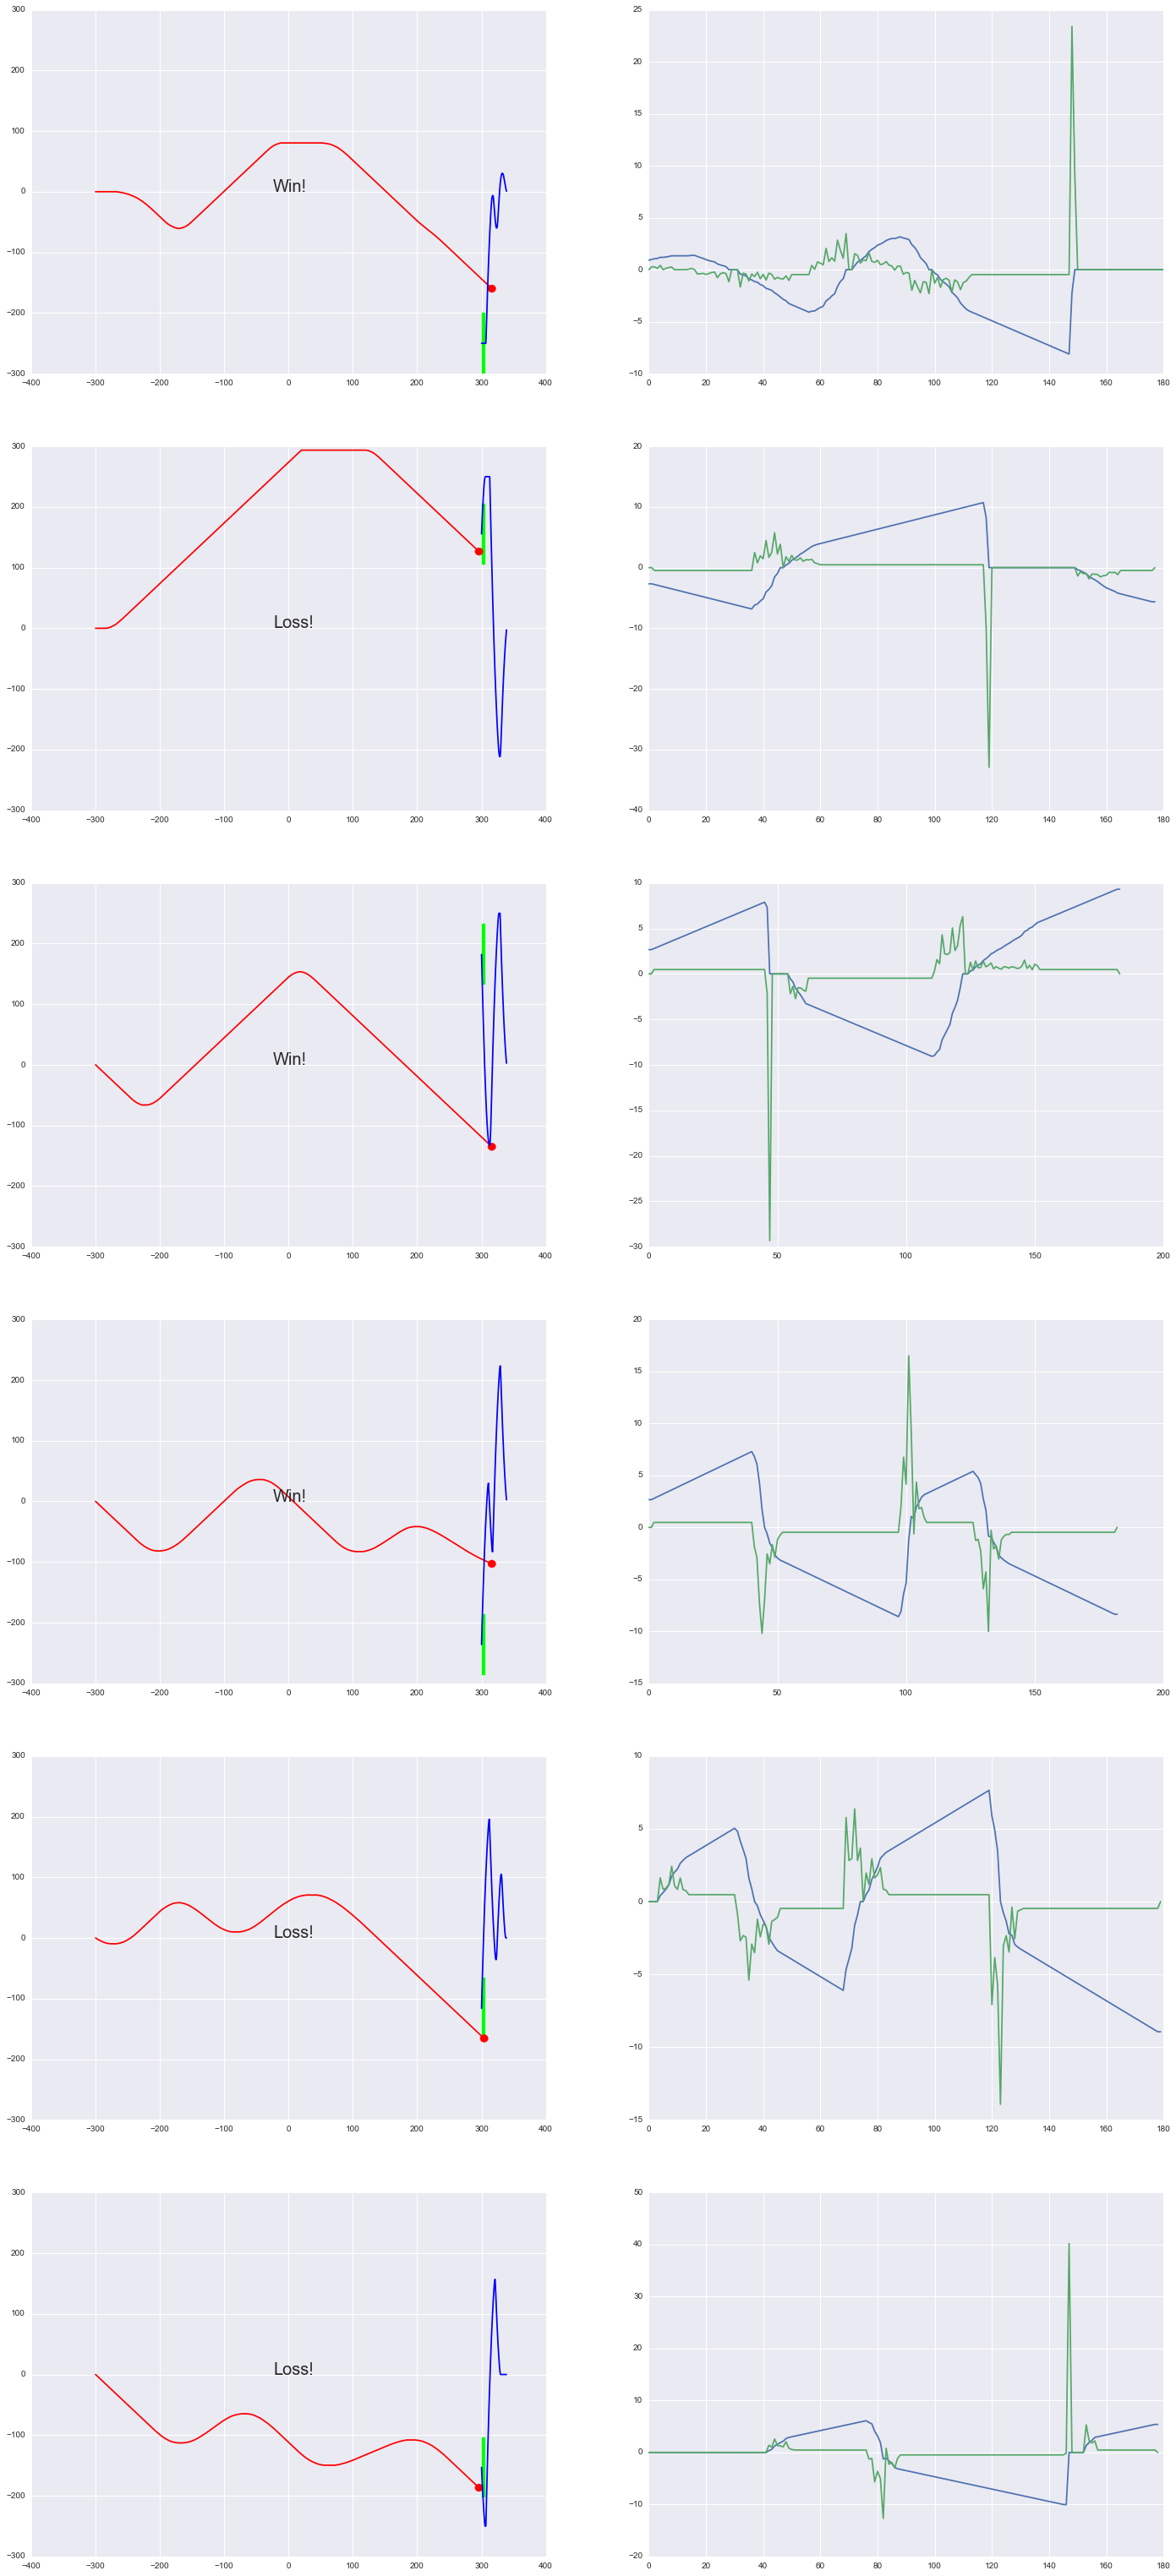

In [111]:
fig, ax = plt.subplots(len(plottingdf), 2, figsize=[24, 9*len(plottingdf)])

for i in range(len(plottingdf)):
    # Ball
    ax[i, 0].plot(plottingdf.loc[i, 'BallPositions'][0], plottingdf.loc[i, 'BallPositions'][1], color='r')
    circle1 = plt.Circle((plottingdf.loc[i, "BallPositions"][0][-1], 
                          plottingdf.loc[i, "BallPositions"][1][-1]), 
                         screen_constants['BallRadius'] , color='r')
    ax[i, 0].add_artist(circle1)
    
    # Bar
    ax[i, 0].plot(np.linspace(screen_constants['FinalLine']+20., 
                           screen_constants['BarStartingPosX'], 
                           len(plottingdf.loc[i, 'BarY'])),
               plottingdf.loc[i, 'BarY'], color='b')
    ax[i, 0].add_patch(mpl.patches.Rectangle(
        (screen_constants['BarStartingPosX'], plottingdf.loc[i, 'BarY'][-1]-50.),   # (x,y)
        screen_constants['BarWidth'],                                               # width
        screen_constants['BarLength'], color='lime'))                         # height
    
    ax[i, 0].set_xlim(-screen_constants['ScreenRect'][0]/2., screen_constants['ScreenRect'][0]/2.)
    ax[i, 0].set_ylim(-screen_constants['ScreenRect'][1]/2., screen_constants['ScreenRect'][1]/2.)
    
    ax[i, 0].text(0.47, 0.5, trial_timing_and_info.loc[i, 'outcome'].capitalize()+'!', 
                   size = 20, transform=ax[i, 0].transAxes)
    
    ax[i,1].plot(derivative(plottingdf.loc[i, 'BarY']))
    ax[i,1].plot(derivative_second_order_again(plottingdf.loc[i, 'BarY'], .5 ))
# fig.savefig('plots_with_derivatives_bar_2_order.png')

In [123]:
t = np.array(ast.literal_eval(df_plotting['TimingSequence'][0]))

In [122]:
yy = np.array(ast.literal_eval(df_plotting['BarY'][0]))

In [125]:
yy

array([   0.71679688,    1.63175456,    2.61450195,    3.66495768,
          4.74674479,    5.93277995,    7.1188151 ,    8.33610026,
          9.60555013,   10.93758138,   12.26961263,   13.60164388,
         14.93367513,   16.26570638,   17.59773763,   18.94018555,
         20.31388346,   21.68758138,   22.95703125,   24.12744141,
         25.20922852,   26.17626953,   27.04947917,   27.85498047,
         28.60310872,   29.15836589,   29.61450195,   29.99772135,
         30.28702799,   30.28702799,   30.28702799,   30.28702799,
         30.28702799,   29.86743164,   29.36442057,   28.75716146,
         27.87882487,   26.89615885,   25.74666341,   24.53466797,
         23.10367839,   21.55802409,   19.76212565,   17.8828125 ,
         15.88875326,   13.66536458,   11.2560366 ,    8.63066949,
          5.77990451,    2.78053928,   -0.47862052,   -3.85629521,
         -7.35248481,  -10.96718931,  -14.70040871,  -18.55214301,
        -22.52239222,  -26.61115632,  -30.59630353,  -34.57528

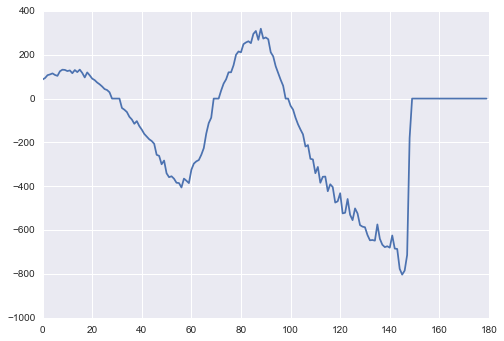

In [127]:
plt.plot(np.diff(yy)/np.diff(t))

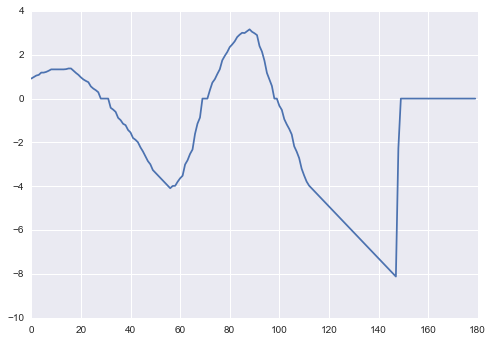

In [128]:
plt.plot(np.diff(yy))

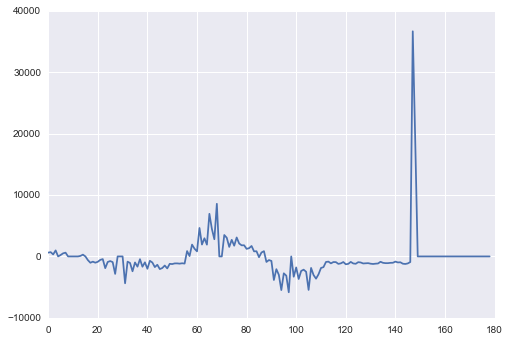

In [131]:
plt.plot(np.diff(yy, 2)/np.diff(t)[1:]**2)

In [136]:
ddy = (yy[2:] - 2 * yy[1:-1] + yy[:-2])/np.diff(t)[1:]**2

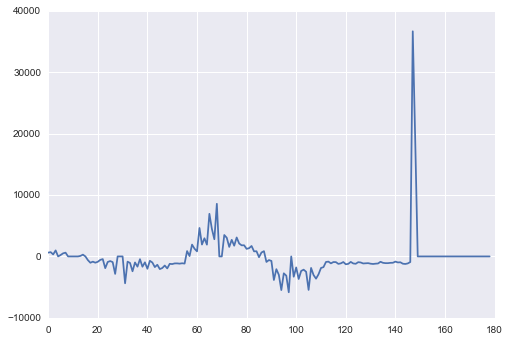

In [137]:
plt.plot(ddy)

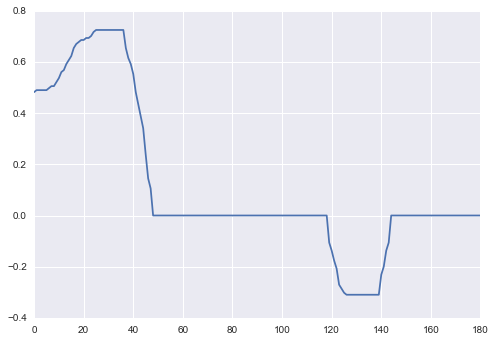

In [144]:
plt.plot(plottingdf['BallJoystickHistory'][0][0])